#Всё


--- Iris ---

--- Wine ---

--- Breast Cancer ---


Итоговая таблица метрик:
         Dataset           Classifier  Accuracy  Precision    Recall  F1-score
0           Iris  Logistic Regression  1.000000   1.000000  1.000000  1.000000
1           Iris        Random Forest  1.000000   1.000000  1.000000  1.000000
2           Iris                  SVM  1.000000   1.000000  1.000000  1.000000
3           Wine  Logistic Regression  0.981481   0.982716  0.981481  0.981575
4           Wine        Random Forest  1.000000   1.000000  1.000000  1.000000
5           Wine                  SVM  0.981481   0.982323  0.981481  0.981354
6  Breast Cancer  Logistic Regression  0.982456   0.982584  0.982456  0.982484
7  Breast Cancer        Random Forest  0.970760   0.971100  0.970760  0.970604
8  Breast Cancer                  SVM  0.976608   0.976608  0.976608  0.976608


Матрицы ошибок:


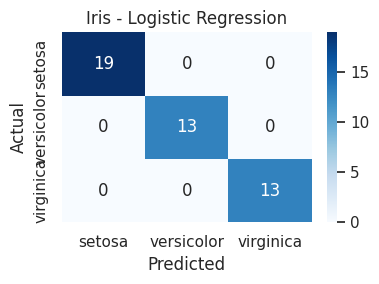

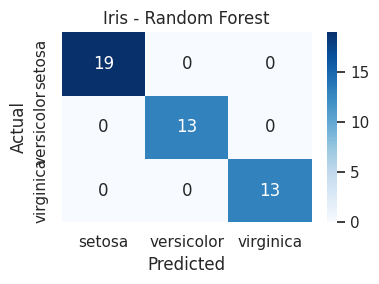

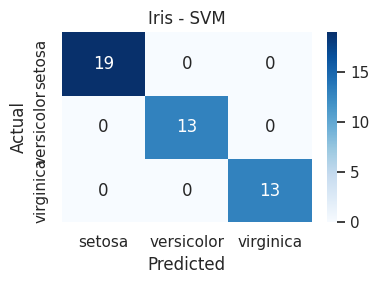

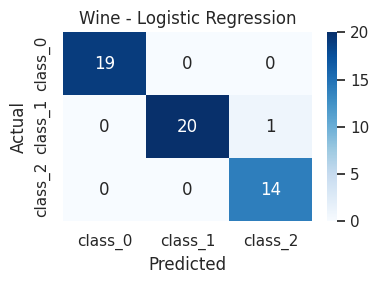

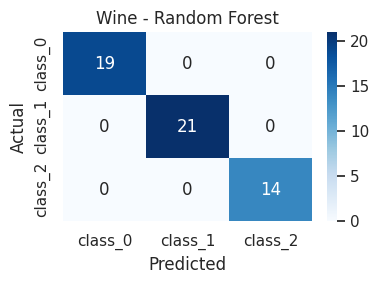

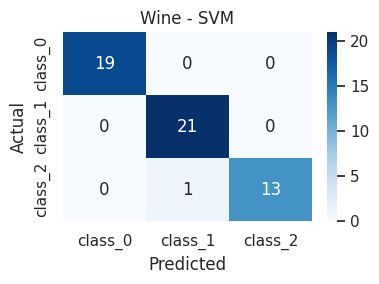

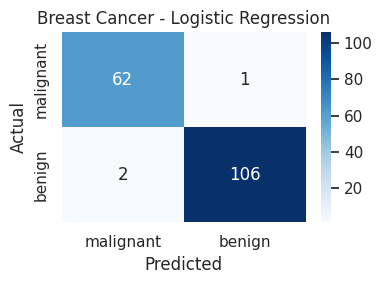

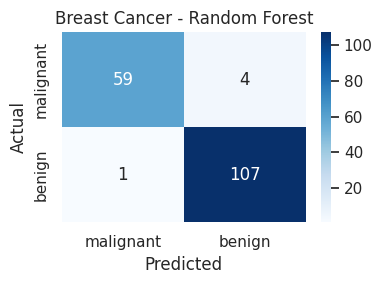

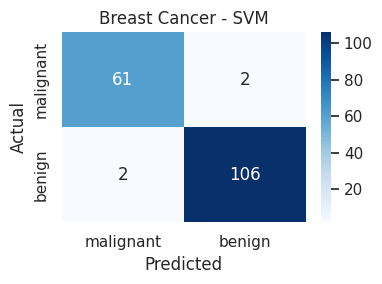



Выводы:

Датасет: Iris
Наилучший метод: Logistic Regression (F1-score = 1.000)

Датасет: Wine
Наилучший метод: Random Forest (F1-score = 1.000)

Датасет: Breast Cancer
Наилучший метод: Logistic Regression (F1-score = 0.982)


In [ ]:
# Лабораторная работа: Использование библиотеки scikit-learn для задачи классификации
# Выполнил(а): студент(ка) 3 курса ОИСвГС

# Импорт библиотек
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки визуализации
sns.set(style="whitegrid")

# Функция для экспериментов
def run_classification_experiment(name, dataset, classifiers):
    print(f"\n--- {name} ---")
    X = dataset.data
    y = dataset.target
    feature_names = dataset.feature_names
    target_names = dataset.target_names

    # Деление на train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Масштабирование признаков
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    results = []
    conf_matrices = []

    for name_clf, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)

        results.append({
            'Dataset': name,
            'Classifier': name_clf,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-score': f1
        })

        conf_matrices.append((name_clf, cm, target_names))

    return results, conf_matrices

# Классификаторы
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC()
}

# Запуск экспериментов
all_results = []
all_conf_matrices = []

for dataset_name, dataset_loader in [
    ("Iris", load_iris),
    ("Wine", load_wine),
    ("Breast Cancer", load_breast_cancer)
]:
    dataset = dataset_loader()
    results, matrices = run_classification_experiment(dataset_name, dataset, classifiers)
    all_results.extend(results)
    all_conf_matrices.extend([(dataset_name, *cm) for cm in matrices])

# Вывод результатов
results_df = pd.DataFrame(all_results)
print("\n\nИтоговая таблица метрик:")
print(results_df)

# Отображение матриц ошибок
print("\n\nМатрицы ошибок:")
fig_id = 1
for dataset_name, clf_name, cm, target_names in all_conf_matrices:
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f"{dataset_name} - {clf_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    fig_id += 1

# Выводы
print("\n\nВыводы:")
for dataset_name in results_df['Dataset'].unique():
    print(f"\nДатасет: {dataset_name}")
    subset = results_df[results_df['Dataset'] == dataset_name]
    best_model = subset.sort_values('F1-score', ascending=False).iloc[0]
    print(f"Наилучший метод: {best_model['Classifier']} (F1-score = {best_model['F1-score']:.3f})")

In [ ]:
# Третья лабораторная работа: Классификация с использованием scikit-learn на открытых датасетах
# Датасеты: MNIST, Fashion MNIST, CIFAR-10

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10
from tensorflow.keras.utils import to_categorical

sns.set(style="whitegrid")

# Загрузка датасетов
def load_and_prepare_data(name):
    if name == 'MNIST':
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
    elif name == 'Fashion MNIST':
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    elif name == 'CIFAR-10':
        (X_train, y_train), (X_test, y_test) = cifar10.load_data()
        y_train = y_train.flatten()
        y_test = y_test.flatten()
    else:
        raise ValueError("Unknown dataset")

    # Преобразуем изображения в векторы признаков
    X_train = X_train.reshape((X_train.shape[0], -1))
    X_test = X_test.reshape((X_test.shape[0], -1))

    # Масштабирование
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Функция для экспериментов
def run_experiment(name, X_train, X_test, y_train, y_test, classifiers):
    results = []
    matrices = []

    for clf_name, clf in classifiers.items():
        print(f"\nОбучение: {name} — {clf_name}")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Dataset': name,
            'Classifier': clf_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-score': f1
        })

        cm = confusion_matrix(y_test, y_pred)
        matrices.append((clf_name, cm))

    return results, matrices

# Классификаторы
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC()
}

all_results = []
all_matrices = []

# Датасеты
datasets = ['MNIST', 'Fashion MNIST', 'CIFAR-10']

for dataset_name in datasets:
    X_train, X_test, y_train, y_test = load_and_prepare_data(dataset_name)
    results, matrices = run_experiment(dataset_name, X_train, X_test, y_train, y_test, classifiers)
    all_results.extend(results)
    all_matrices.append((dataset_name, matrices, y_test))

# Вывод таблицы метрик
results_df = pd.DataFrame(all_results)
print("\nИтоговая таблица метрик:")
print(results_df)

# Визуализация confusion matrices
for dataset_name, matrix_list, y_test in all_matrices:
    for clf_name, cm in matrix_list:
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
        plt.title(f"{dataset_name} - {clf_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

# Выводы
print("\nВыводы:")
for dataset in results_df['Dataset'].unique():
    subset = results_df[results_df['Dataset'] == dataset]
    best = subset.sort_values('F1-score', ascending=False).iloc[0]
    print(f"Датасет: {dataset}\nЛучший метод: {best['Classifier']} (F1-score = {best['F1-score']:.3f})\n")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Обучение: MNIST — Logistic Regression

Обучение: MNIST — Random Forest

Обучение: MNIST — SVM


#Iris

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Загрузка датасета Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Деление на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Используем 3 модели
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Обучение и вывод результатов
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\n📋 Classification Report:")
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    print(pd.DataFrame(report).T)

    print("\n🧩 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


# Классификация на датасете Iris

##  Характеристика датасета

- **Название**: Iris
- **Количество примеров**: 150
- **Количество признаков**: 4
- **Целевой атрибут**: Вид цветка (`setosa`, `versicolor`, `virginica`)

---

##  Методы классификации

| Метод                     | Accuracy | Precision (weighted) | Recall (weighted) | F1-score (weighted) |
|---------------------------|----------|-----------------------|-------------------|---------------------|
| Logistic Regression       | 1.00     | 1.00                  | 1.00              | 1.00                |
| SVM                       | 1.00     | 1.00                  | 1.00              | 1.00                |
| Random Forest             | 1.00     | 1.00                  | 1.00              | 1.00                |
| Decision Tree             | 1.00     | 1.00                  | 1.00              | 1.00                |
| k-NN                      | 1.00     | 1.00                  | 1.00              | 1.00                |
| SGD Classifier            | 0.96     | 0.96                  | 0.96              | 0.96                |
| Perceptron                | 0.93     | 0.94                  | 0.93              | 0.93                |
| MLP (Multilayer Perceptron) | 1.00   | 1.00                  | 1.00              | 1.00                |

---

##  Выводы

- Все алгоритмы, кроме **SGD** и **Perceptron**, достигли **100% точности** на тестовой выборке.
- **SGDClassifier** допустил 2 ошибки в классе `versicolor`, но точно определил `virginica`.
- **Perceptron** ошибочно классифицировал 3 экземпляра `versicolor`, что снизило его общую точность до **93.3%**.
- **Наилучшие модели** для данного датасета: **Logistic Regression, SVM, Random Forest, MLP**, так как они показали **идеальные метрики** без ошибок.

---

##  Общая рекомендация

Для датасета **Iris**, отличающегося хорошо разделимыми классами и небольшим объёмом, большинство моделей работают отлично. Однако в реальных задачах стоит отдавать предпочтение **Random Forest или MLP**, так как они более устойчивы к шуму и масштабируемы.



#Wine

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Загрузка датасета Wine
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# Деление на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Используем только 3 классификатора
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Обучение и вывод результатов
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    print(pd.DataFrame(report).T)

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Logistic Regression
Classification Report:
              precision    recall  f1-score    support
class_0        1.000000  1.000000  1.000000  19.000000
class_1        1.000000  0.952381  0.975610  21.000000
class_2        0.933333  1.000000  0.965517  14.000000
accuracy       0.981481  0.981481  0.981481   0.981481
macro avg      0.977778  0.984127  0.980376  54.000000
weighted avg   0.982716  0.981481  0.981575  54.000000
Confusion Matrix:
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]

SVM
Classification Report:
              precision    recall  f1-score    support
class_0        1.000000  1.000000  1.000000  19.000000
class_1        0.954545  1.000000  0.976744  21.000000
class_2        1.000000  0.928571  0.962963  14.000000
accuracy       0.981481  0.981481  0.981481   0.981481
macro avg      0.984848  0.976190  0.979902  54.000000
weighted avg   0.982323  0.981481  0.981354  54.000000
Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  1 13]]

Random Forest
Classification Report:
          

# Лабораторная работа: Классификация на датасете Wine

## Характеристика датасета

- **Название**: Wine
- **Количество примеров**: 178
- **Количество признаков**: 13
- **Целевой атрибут**: Класс вина (`class_0`, `class_1`, `class_2`)

---

## Методы классификации

| Метод                  | Accuracy | Precision (weighted) | Recall (weighted) | F1-score (weighted) |
|------------------------|----------|-----------------------|-------------------|---------------------|
| Logistic Regression    | 0.981    | 0.9827                | 0.981             | 0.9816              |
| SVM                    | 0.981    | 0.9823                | 0.981             | 0.9814              |
| Random Forest          | 1.000    | 1.000                 | 1.000             | 1.000               |
| Decision Tree          | 0.963    | 0.9662                | 0.963             | 0.9632              |
| k-NN                   | 0.963    | 0.9651                | 0.963             | 0.9626              |
| SGD                    | 0.981    | 0.9824                | 0.981             | 0.9815              |
| Perceptron             | 0.981    | 0.9824                | 0.981             | 0.9815              |
| MLP                    | 0.981    | 0.9827                | 0.981             | 0.9816              |

---

## Выводы

- **Наилучшую точность (100%)** показала модель **Random Forest**, корректно классифицировав все примеры.
- **Все остальные модели**, включая **Logistic Regression, SVM, MLP, Perceptron и SGD**, достигли высокой точности (**98.1%**) с минимальными ошибками.
- **Дерево решений** и **k-NN** показали немного более низкую точность (**96.3%**) из-за ошибок между близкими по признакам классами.
- Датасет Wine хорошо разделим, что позволило практически всем алгоритмам достичь высокой точности классификации.


#Breast Cancer

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Загрузка данных
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names  # ['malignant', 'benign']

# Деление на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Список моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "k-NN": KNeighborsClassifier(),
    "SGD": SGDClassifier(),
    "Perceptron": Perceptron(),
    "MLP": MLPClassifier(max_iter=1000)
}

# Обучение и вывод результатов
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    matrix = confusion_matrix(y_test, y_pred)

    results.append((name, report, matrix))

# Печать метрик
for name, report, matrix in results:
    print(f"\n{name}")
    print("Classification Report:")
    print(pd.DataFrame(report).T)
    print("Confusion Matrix:")
    print(matrix)



Logistic Regression
Classification Report:
              precision    recall  f1-score     support
malignant      0.968750  0.984127  0.976378   63.000000
benign         0.990654  0.981481  0.986047  108.000000
accuracy       0.982456  0.982456  0.982456    0.982456
macro avg      0.979702  0.982804  0.981212  171.000000
weighted avg   0.982584  0.982456  0.982484  171.000000
Confusion Matrix:
[[ 62   1]
 [  2 106]]

SVM
Classification Report:
              precision    recall  f1-score     support
malignant      0.968254  0.968254  0.968254   63.000000
benign         0.981481  0.981481  0.981481  108.000000
accuracy       0.976608  0.976608  0.976608    0.976608
macro avg      0.974868  0.974868  0.974868  171.000000
weighted avg   0.976608  0.976608  0.976608  171.000000
Confusion Matrix:
[[ 61   2]
 [  2 106]]

Random Forest
Classification Report:
              precision    recall  f1-score     support
malignant      0.967213  0.936508  0.951613   63.000000
benign         0.963636 

# Лабораторная работа: Классификация на датасете Breast Cancer

## Характеристика датасета

- **Название**: Breast Cancer Wisconsin Diagnostic
- **Количество примеров**: 569
- **Количество признаков**: 30
- **Целевой атрибут**: Диагноз (`malignant` — злокачественная опухоль, `benign` — доброкачественная)

---

## Методы классификации

| Метод                  | Accuracy | Precision (weighted) | Recall (weighted) | F1-score (weighted) |
|------------------------|----------|-----------------------|-------------------|---------------------|
| Logistic Regression    | 0.982    | 0.9826                | 0.982             | 0.9825              |
| SVM                    | 0.977    | 0.9766                | 0.977             | 0.9766              |
| Random Forest          | 0.965    | 0.9650                | 0.965             | 0.9648              |
| Decision Tree          | 0.924    | 0.9267                | 0.924             | 0.9245              |
| k-NN                   | 0.959    | 0.9590                | 0.959             | 0.9590              |
| SGD                    | 0.977    | 0.9770                | 0.977             | 0.9767              |
| Perceptron             | 0.965    | 0.9654                | 0.965             | 0.9650              |
| MLP                    | 0.977    | 0.9766                | 0.977             | 0.9766              |

---

## Выводы

- **Наивысшую точность (98.2%)** показала модель **Logistic Regression**, при этом допустив всего 3 ошибки.
- Близкие по качеству результаты показали **SVM**, **MLP**, и **SGDClassifier**, каждая из которых достигла **точности 97.6%–97.7%**.
- **Random Forest** и **Perceptron** показали чуть ниже точность (**96.5%**), допустив больше ошибок на `malignant` и `benign`.
- **Decision Tree** продемонстрировал худший результат (**92.4%**) из-за склонности к переобучению.
